In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.chdir('F:\jupyter_notebook\Python绘图：Matplotlib&Seaborn')

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

# 直方图和密度图

In [2]:
data = pd.read_csv('lianjia.csv')

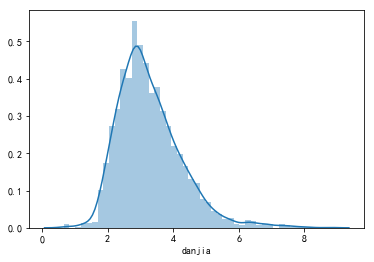

In [3]:
sns.distplot(data.danjia);

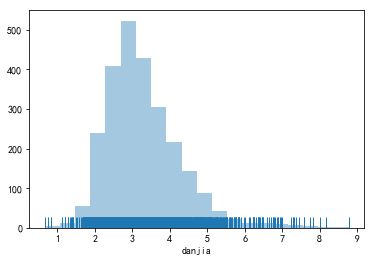

In [4]:
sns.distplot(data.danjia, kde=False, bins=20,
            rug=True); #对于每个数据进行显示

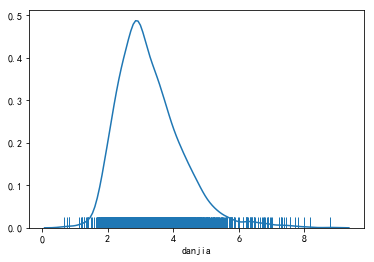

In [5]:
sns.distplot(data.danjia, hist=False, rug=True);

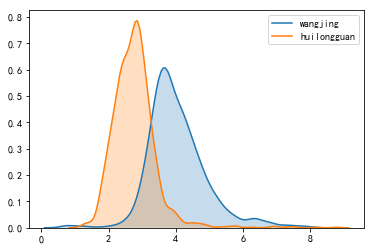

In [6]:
sns.kdeplot(data[data.bankuai=='望京'].danjia, label='wangjing',
           shade=True) #填充效果
sns.kdeplot(data[data.bankuai=='回龙观'].danjia, label='huilongguan', shade=True);

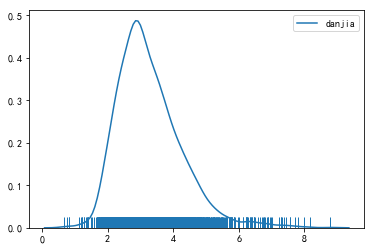

In [7]:
sns.kdeplot(data.danjia)
sns.rugplot(data.danjia); #对于每个数据进行显示

# 散点图,hexbin和核密度估计

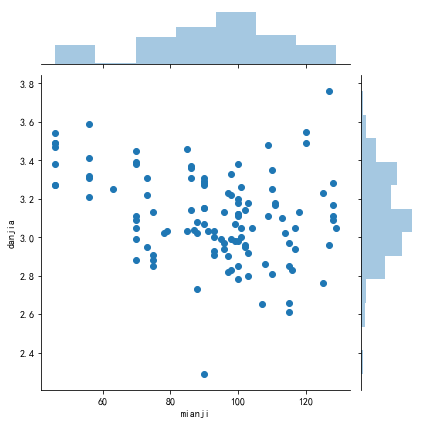

In [8]:
sns.jointplot(x='mianji', y='danjia', data=data[data.xiaoqu=='新龙城']);

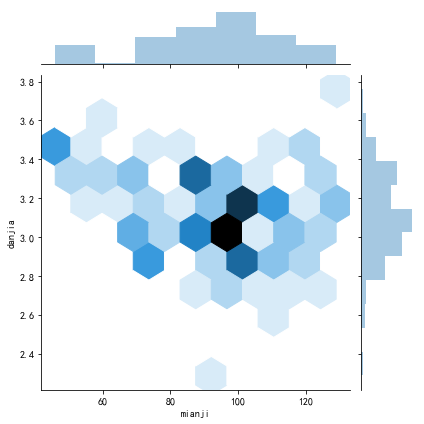

In [9]:
sns.jointplot(x='mianji', y='danjia', kind='hex', data=data[data.xiaoqu=='新龙城']);

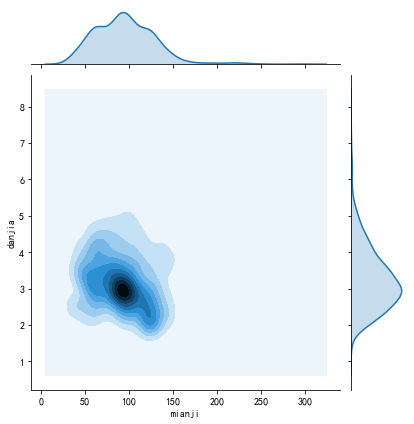

In [10]:
sns.jointplot(x='mianji', y='danjia', kind='kde', data=data[data.louceng=='中楼层']);

# 二维核密度图

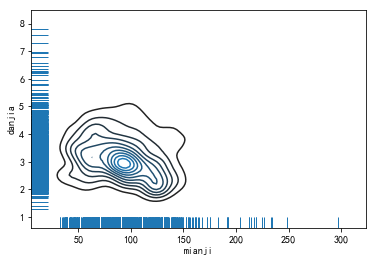

In [11]:
sns.kdeplot(data[data.louceng=='中楼层'].mianji, data[data.louceng=='中楼层'].danjia)
sns.rugplot(data[data.louceng=='中楼层'].mianji, axis='x')
sns.rugplot(data[data.louceng=='中楼层'].danjia, axis='y');

# 线性回归可视化

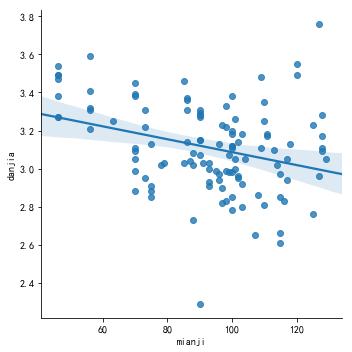

In [12]:
sns.lmplot(x='mianji', y='danjia', data=data[data.xiaoqu=='新龙城']);

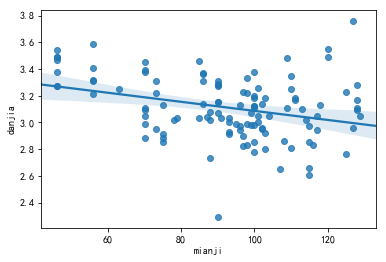

In [13]:
sns.regplot(x='mianji', y='danjia', data=data[data.xiaoqu=='新龙城']);

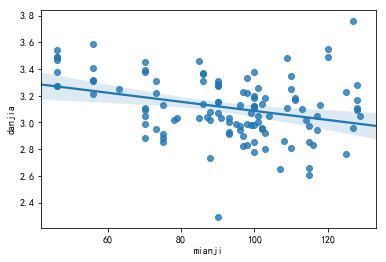

In [14]:
sns.regplot(data[data.xiaoqu=='新龙城'].mianji, data[data.xiaoqu=='新龙城'].danjia);

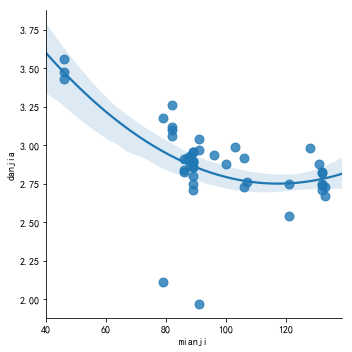

In [15]:
sns.lmplot(x='mianji', y='danjia', data=data[data.xiaoqu=='紫金新干线'],
           order=2, #二阶拟合
           scatter_kws={'s':80}); #点的大小

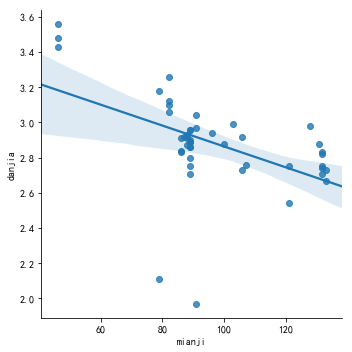

In [16]:
sns.lmplot(x='mianji', y='danjia', data=data[data.xiaoqu=='紫金新干线']);

# 离散变量的线性回归

In [17]:
bins = [0, 60, 80, 100, 120, 140, 200, 300, 600]
cat = pd.cut(data.mianji, bins=bins, labels=range(1, len(bins))) #数据离散化
data = data.assign(mj_cat=cat)

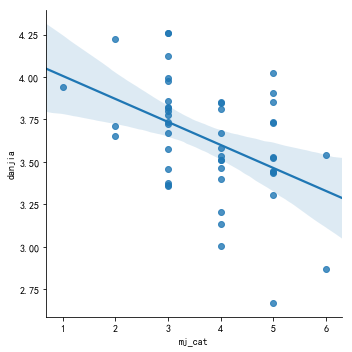

In [18]:
sns.lmplot(x='mj_cat', y='danjia', data=data[data.xiaoqu=='望京新城'], y_jitter=0.05); #点摆动

In [19]:
sns.lmplot?

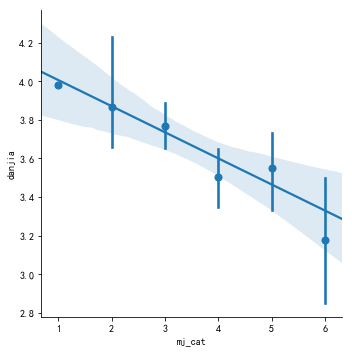

In [20]:
sns.lmplot(x='mj_cat', y='danjia', data=data[data.xiaoqu=='望京新城'], x_estimator=np.mean); #离散值求均值

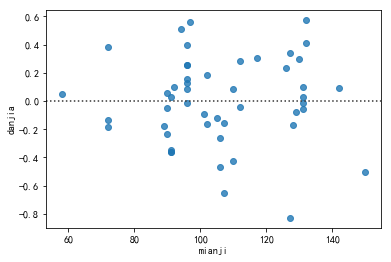

In [21]:
sns.residplot(x='mianji', y='danjia', data=data[data.xiaoqu=='望京新城']); #检查简单的回归模型是否拟合数据集

# 分类散点图

In [22]:
print(data.louceng.unique())

['低楼层' '中楼层' '高楼层' '地下室']


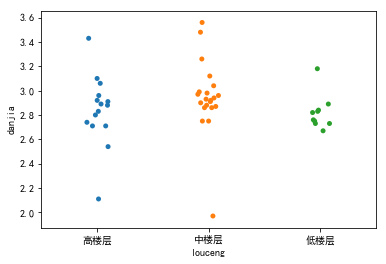

In [23]:
sns.stripplot(x='louceng', y='danjia', data=data[data.xiaoqu=='紫金新干线'], jitter=True);

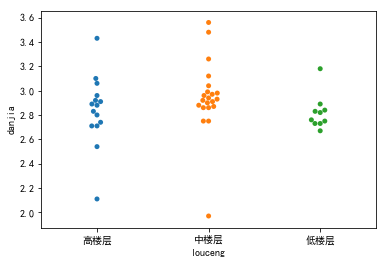

In [24]:
sns.swarmplot(x='louceng', y='danjia', data=data[data.xiaoqu=='紫金新干线']);

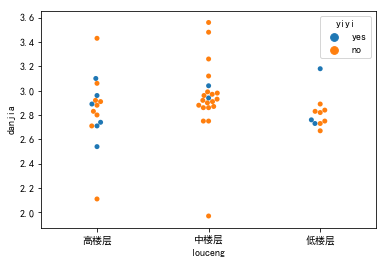

In [25]:
sns.swarmplot(x='louceng', y='danjia', data=data[data.xiaoqu=='紫金新干线'], hue='yiyi'); #颜色进行条件区分

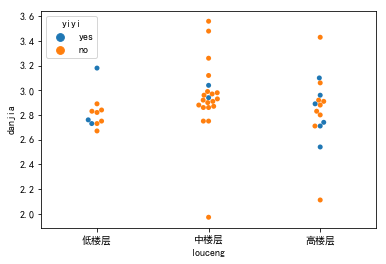

In [26]:
order=['低楼层', '中楼层', '高楼层']
sns.swarmplot(x='louceng', y='danjia', data=data[data.xiaoqu=='紫金新干线'], hue='yiyi', order=order);

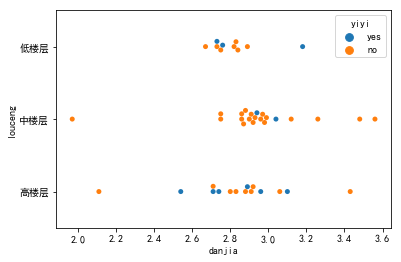

In [27]:
sns.swarmplot(x='danjia', y='louceng', data=data[data.xiaoqu=='紫金新干线'], hue='yiyi', order=order);

# 箱型图

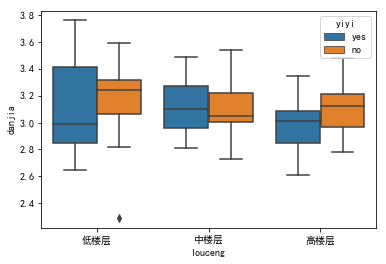

In [28]:
sns.boxplot(x='louceng', y='danjia', data=data[data.xiaoqu=='新龙城'], hue='yiyi');

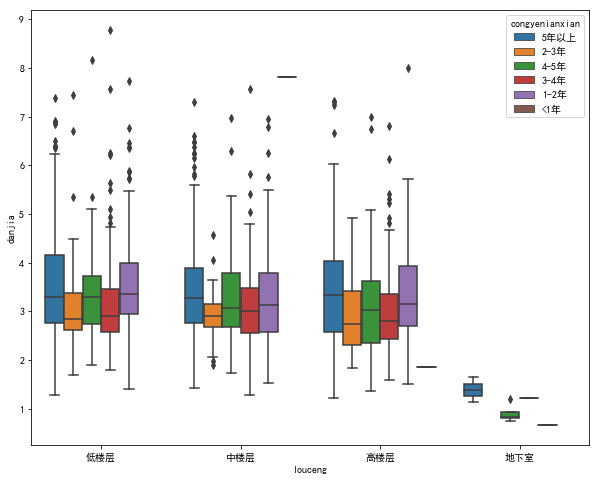

In [29]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='louceng', y='danjia', data=data, hue='congyenianxian');

# 提琴图

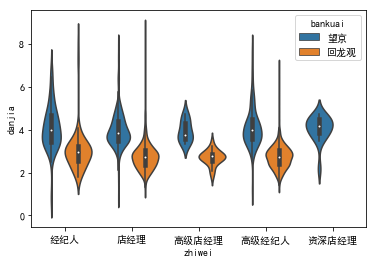

In [30]:
sns.violinplot(x='zhiwei', y='danjia', data=data, hue='bankuai');

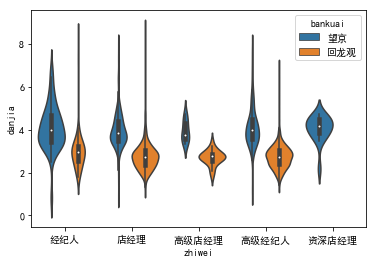

In [31]:
sns.violinplot(x='zhiwei', y='danjia', data=data, hue='bankuai', scale='count');

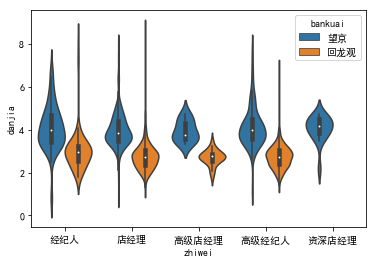

In [32]:
sns.violinplot(x='zhiwei', y='danjia', data=data, hue='bankuai', scale='width');

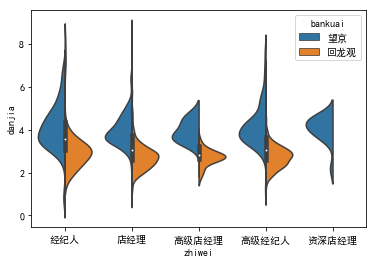

In [33]:
sns.violinplot(x='zhiwei', y='danjia', data=data, hue='bankuai', scale='width', split=True);

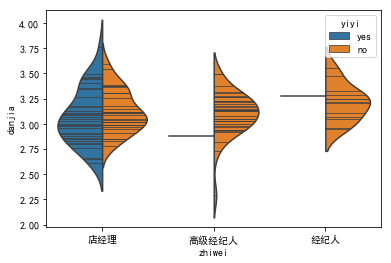

In [34]:
sns.violinplot(x='zhiwei', y='danjia', data=data[data.xiaoqu=='新龙城'], hue='yiyi', scale='width', split=True, inner='stick');

# 条形图

In [35]:
top10 = data.xiaoqu.value_counts()[:10].index
data10 = data[data.xiaoqu.isin(top10)]

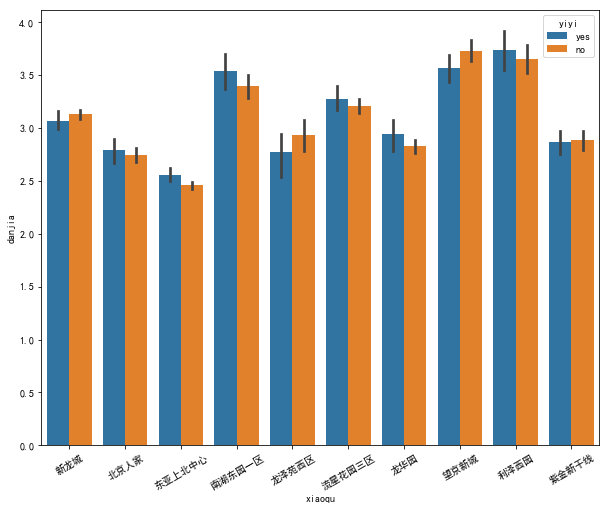

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x='xiaoqu', y='danjia', data=data10, hue='yiyi')
plt.xticks(rotation=30);

# 计数图和点图

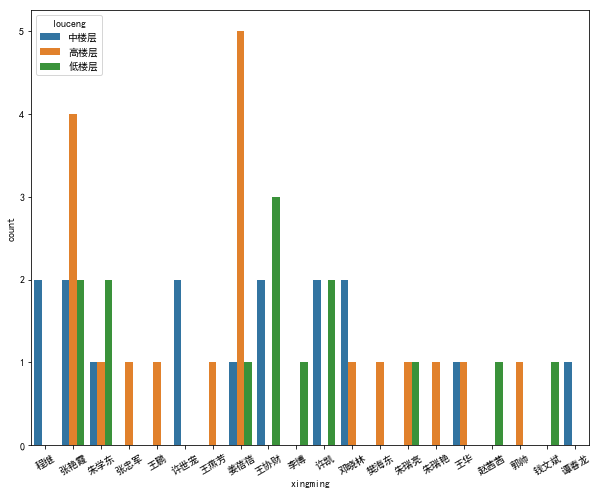

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(x='xingming', data=data[data.xiaoqu=='望京新城'], hue='louceng')
plt.xticks(rotation=30);

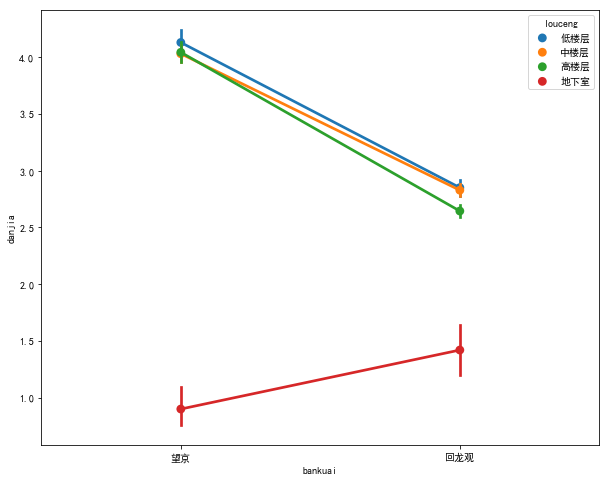

In [38]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.pointplot(x='bankuai', y='danjia', hue='louceng', data=data);

# 样式设置

In [39]:
top5 = data.mendian.value_counts()[:5].index
data5 = data[data.mendian.isin(top5)]

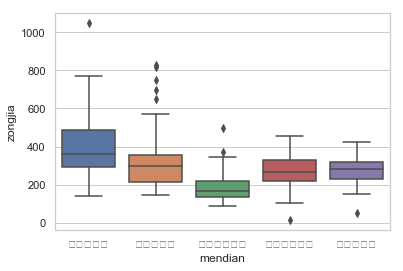

In [53]:
sns.set_style('whitegrid')
sns.boxplot(x='mendian', y='zongjia', data=data5);

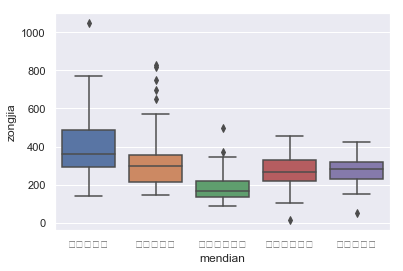

In [54]:
sns.set_style('darkgrid')
sns.boxplot(x='mendian', y='zongjia', data=data5);

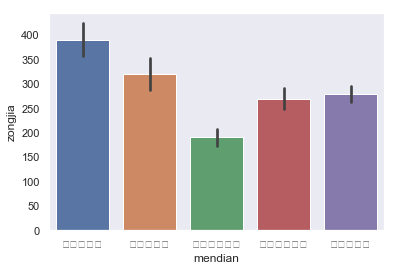

In [55]:
sns.set_style('dark')
sns.barplot(x='mendian', y='zongjia', data=data5);

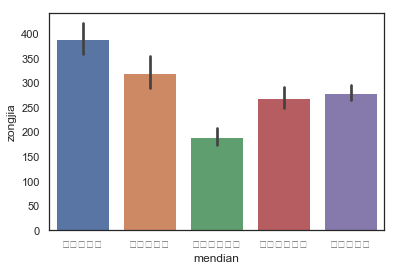

In [56]:
sns.set_style('white')
sns.barplot(x='mendian', y='zongjia', data=data5);

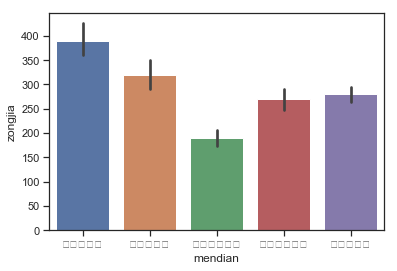

In [57]:
sns.set_style('ticks')
sns.barplot(x='mendian', y='zongjia', data=data5);

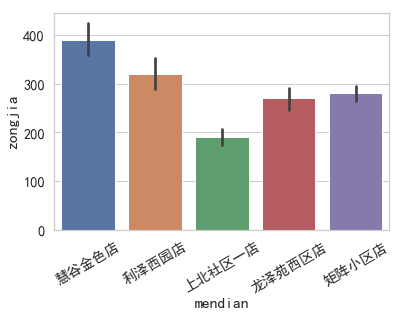

In [58]:
sns.set(style='whitegrid', font='SimHei', font_scale=1.3)
sns.barplot(x='mendian', y='zongjia', data=data5)
plt.xticks(rotation=30);

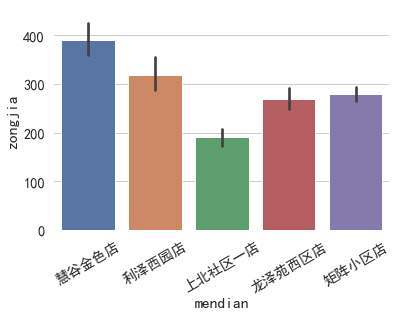

In [59]:
sns.barplot(x='mendian', y='zongjia', data=data5)
plt.xticks(rotation=30)
sns.despine(left=True, bottom=True);

In [47]:
sns.despine?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

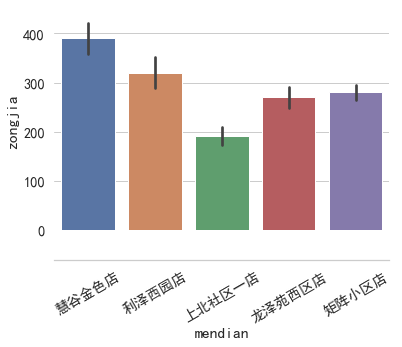

In [60]:
sns.barplot(x='mendian', y='zongjia', data=data5)
sns.despine(left=True, offset=30)
plt.xticks(rotation=30)

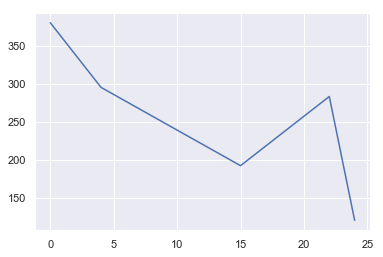

In [61]:
sns.set()
plt.plot(data5.zongjia[:5]);

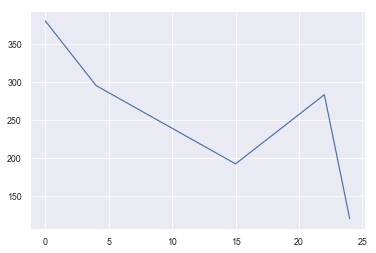

In [62]:
sns.set_context('paper')
plt.plot(data5.zongjia[:5]);

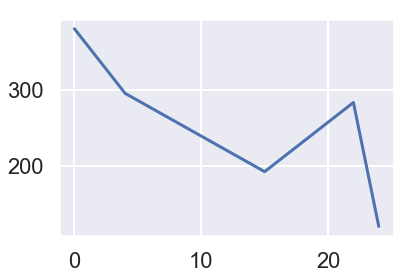

In [63]:
sns.set_context('poster')
plt.plot(data5.zongjia[:5]);

# 颜色设置

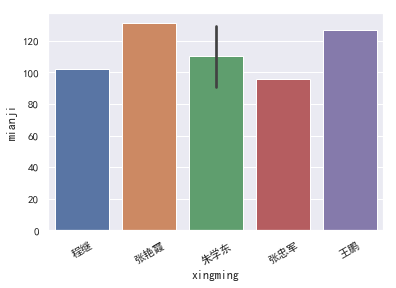

In [83]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji)
plt.xticks(rotation=30);

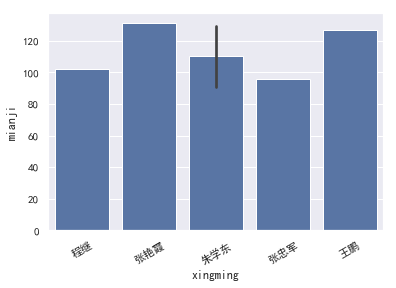

In [96]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, color='b')
plt.xticks(rotation=30);

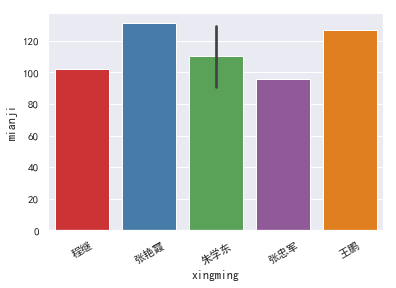

In [97]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, palette='Set1') #Set2, Set3
plt.xticks(rotation=30);

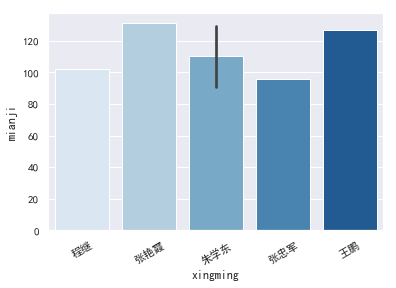

In [98]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, palette='Blues')
plt.xticks(rotation=30);

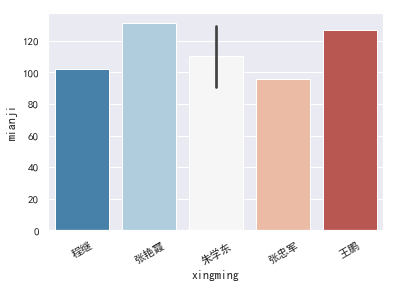

In [101]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, palette='RdBu_r')
plt.xticks(rotation=30);

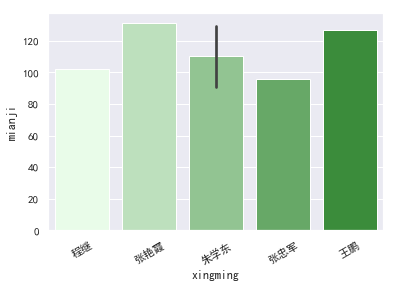

In [103]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, palette=sns.light_palette('green'))
plt.xticks(rotation=30);

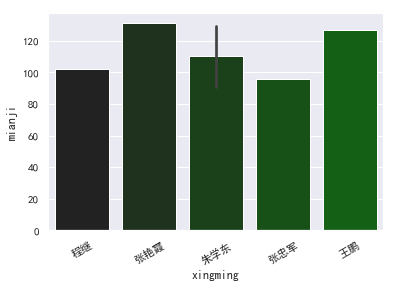

In [105]:
sns.set(font='SimHei', color_codes=True)
sns.barplot(x=data[data.xiaoqu=='望京新城'][:6].xingming, y=data[data.xiaoqu=='望京新城'][:6].mianji, palette=sns.dark_palette('green'))
plt.xticks(rotation=30);

# 函数factorplot()

In [106]:
sns.set(font_scale=1, font='SimHei', color_codes=True)

In [110]:
tips = sns.load_dataset('tips')

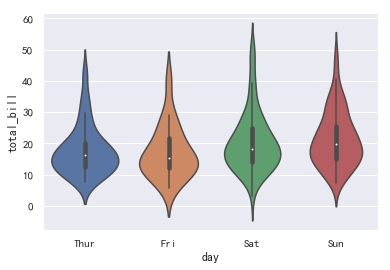

In [111]:
sns.violinplot(x=tips.day, y=tips.total_bill);

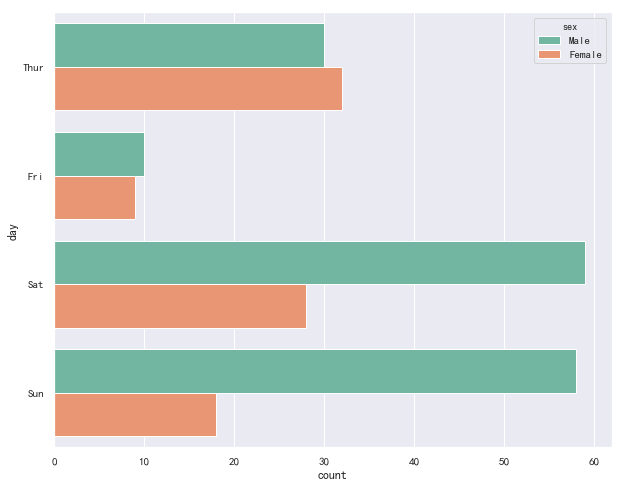

In [112]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.countplot(y='day', data=tips, hue='sex', palette='Set2');

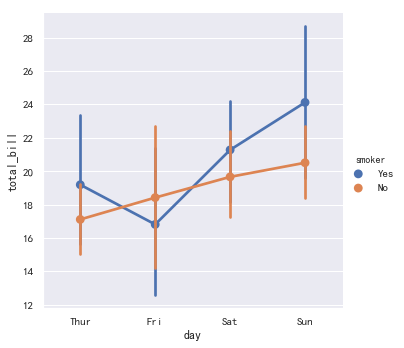

In [113]:
sns.factorplot(x='day', y='total_bill', data=tips, hue='smoker');

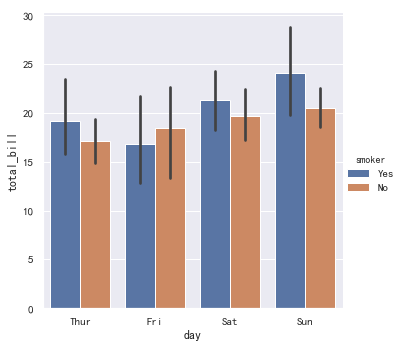

In [114]:
sns.factorplot(x='day', y='total_bill', data=tips, hue='smoker', kind='bar');

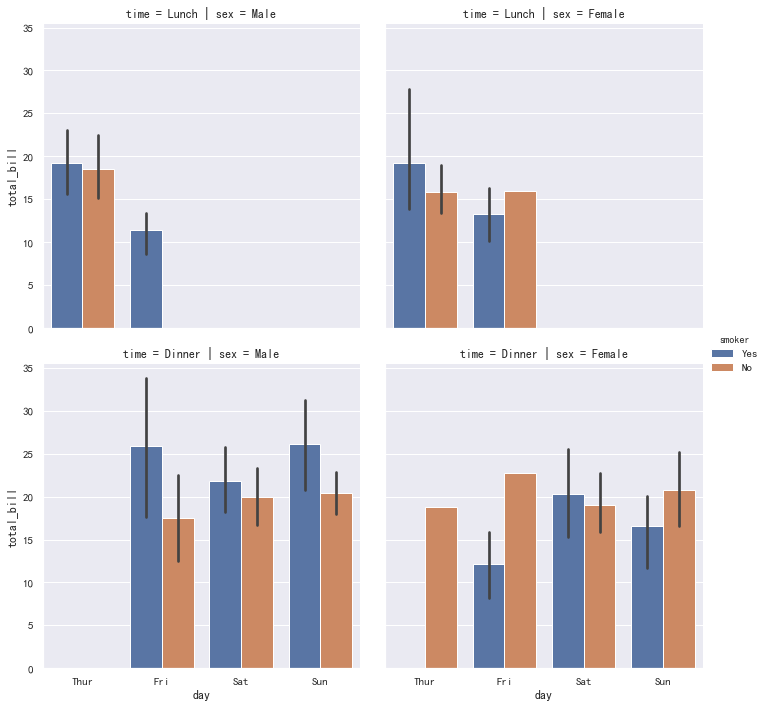

In [116]:
sns.factorplot(x='day', y='total_bill', data=tips, hue='smoker', kind='bar', col='sex', row='time');

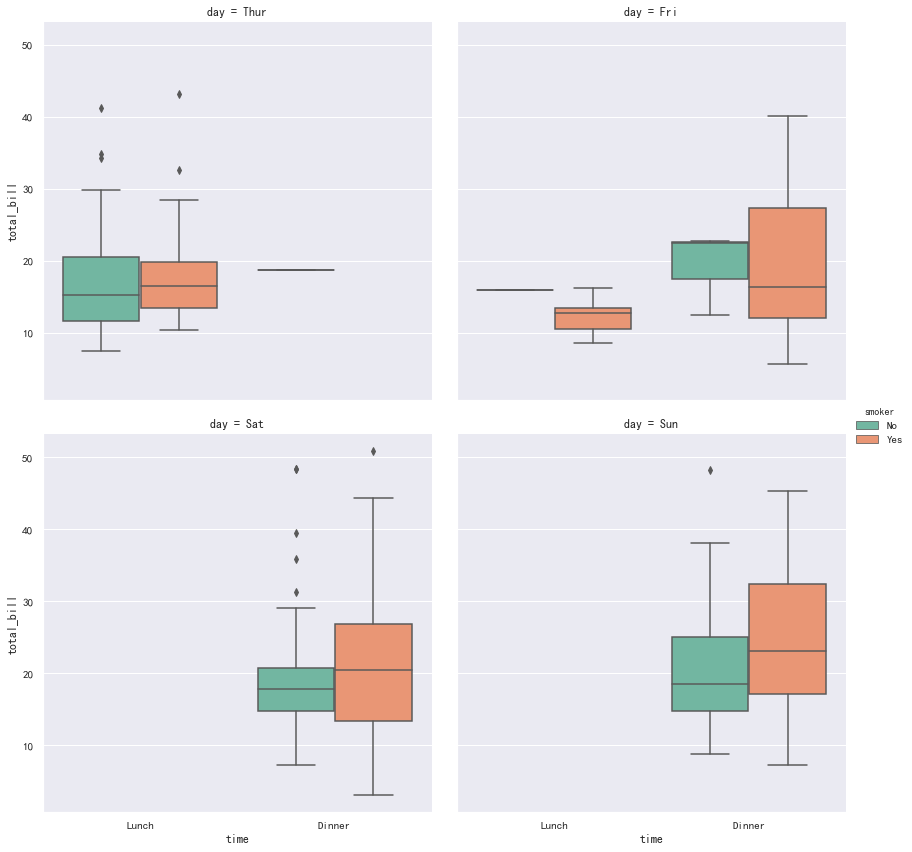

In [123]:
sns.factorplot(x='time', y='total_bill', data=tips, hue='smoker', hue_order=['No', 'Yes'], kind='box', col='day',
               col_wrap=2, #图形折叠一次,显示为2行
               size=6, #图形大小
               aspect=1, #长宽比
               palette='Set2');

# 热力图heatmap

In [132]:
top10 = data.mendian.value_counts()[:10].index
data10 = data[data.mendian.isin(top10)]
data10 = data10.pivot_table('xingming', index='mendian', columns='congyenianxian', aggfunc='count')

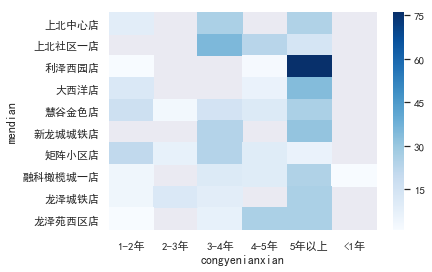

In [134]:
sns.heatmap(data10, cmap='Blues');

# 成对数据关系pairplot

In [135]:
iris = sns.load_dataset('iris')

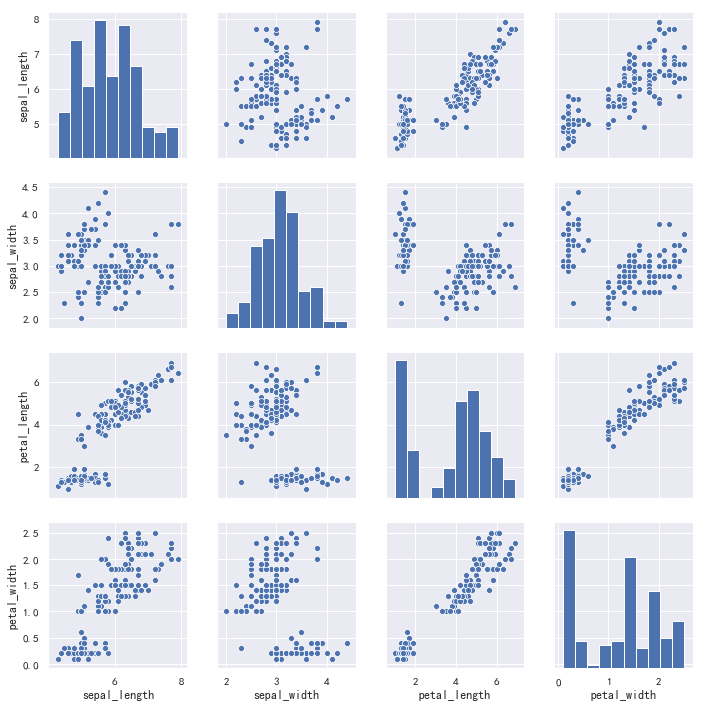

In [136]:
sns.pairplot(iris);

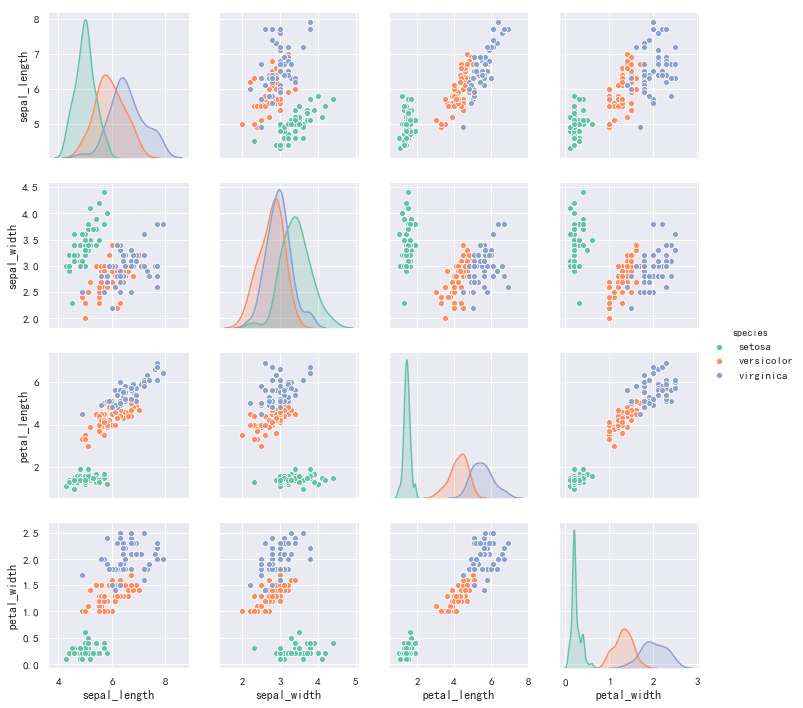

In [137]:
g = sns.pairplot(iris, hue='species', palette='Set2', diag_kind='kde', size=2.5);

# 绘制数据网格

In [138]:
sns.set(style='ticks', font='SimHei')

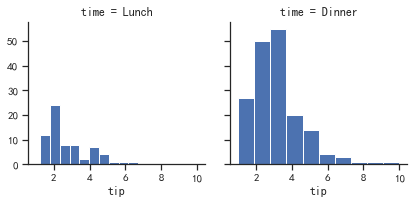

In [141]:
g = sns.FacetGrid(tips, col='time')
g.map(plt.hist, 'tip');

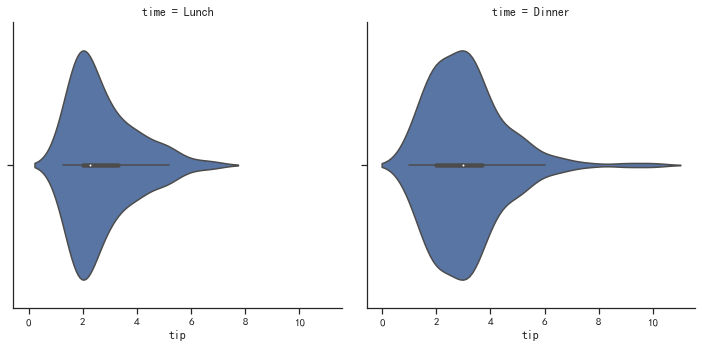

In [142]:
sns.factorplot(x='tip', data=tips, col='time', kind='violin');

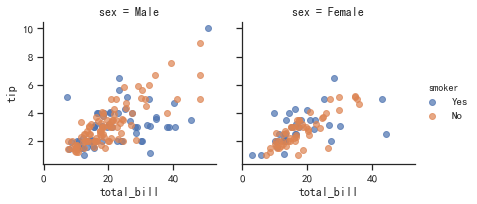

In [145]:
g = sns.FacetGrid(tips, col='sex', hue='smoker')
g.map(plt.scatter, 'total_bill', 'tip',
      alpha=0.7) #透明度
g.add_legend();

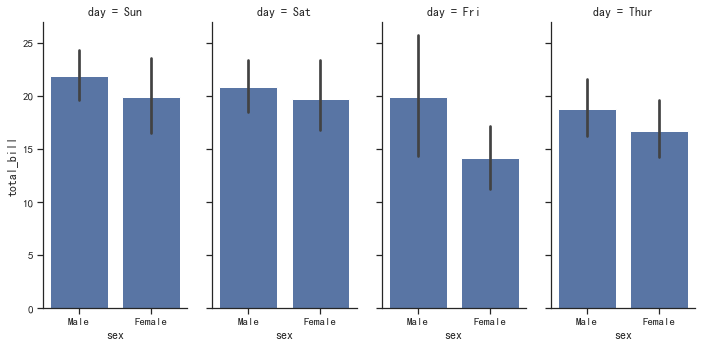

In [148]:
g = sns.FacetGrid(tips, col='day', size=5, aspect=0.5, col_order=['Sun', 'Sat', 'Fri', 'Thur'])
g.map(sns.barplot, 'sex', 'total_bill');